<a href="https://colab.research.google.com/github/dkalenov/Airbnb-Apartments-Rent/blob/main/Airbnb_Apartments_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Berlin Apartments Rent

Business task from the customer: We are planning to invest in real estate. We want to buy some apartments/houses in Berlin to rent out on Airbnb. We need the most profitable options within the limited investment

***Project Objective:***

Select criteria for purchasing real estate in Berlin for rent on Airbnb.

***Tasks:***
- Analyze the data;
- Formulate hypotheses;
- Determine the list of criteria.

## Data Preprocessing

### Functions for data processing and EDA

In [1]:
# Function for displaying basic information about the dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def basic_data_preprocessing(dataframe):
    # Convert all column titles to lowercase with "_" between words
    dataframe.columns = [x.lower().replace(' ', '_') for x in dataframe.columns.values]

    # Basic information about the dataset
    rows_num, columns_num = dataframe.shape
    print(f'Number of records: {rows_num}')
    print(f'Number of columns: {columns_num}\n')
    print('-' * 75)

    # Dataset information
    print("\nDataset Information:")
    display(dataframe.info())
    print()
    print('-' * 75)

    # Checking for missing values
    missing_values = dataframe.isnull().sum()
    if missing_values.sum() > 0:
        print("Missing values:")
        display(pd.DataFrame(missing_values, columns=['Missing Count']))
        display(dataframe[dataframe.isna().any(axis=1)])
    else:
        print("No missing values.")
    print('-' * 75)

    # Checking for zero-filled columns
    zero_columns = dataframe.columns[(dataframe == 0.0).any()]
    zero_count = dataframe[zero_columns].apply(lambda x: x.value_counts().get(0, 0))
    if zero_count.sum() != 0:
        print('Rows with value 0 found:')
        display(pd.DataFrame(zero_count, columns=['Zero Count']))
    else:
        print('No rows with value 0.')
    print('-' * 75)

    # Checking for duplicates
    if dataframe.duplicated().sum() > 0:
        print("Duplicate data found. Number of duplicates:", dataframe.duplicated().sum())
        display(dataframe[dataframe.duplicated(keep=False)])
    else:
        print("No duplicates found.")
    print('-' * 75)

    # Checking for negative values in the dataframe
    # Excluding columns with string data type (object type)
    dataframe_digits = dataframe.select_dtypes(exclude=['object'])
    if (dataframe_digits < 0).sum().sum() > 0:
        print("Negative values found:")
        display(pd.DataFrame((dataframe_digits < 0).sum(), columns=['Negative Value Count']))
    else:
        print('No negative values found.')
    print('-' * 75)

    # Statistical description of the data
    print("\nStatistical Description of the Data:\n")
    display(dataframe.describe())
    print('-' * 75)

    # Data Distribution
    print("\nData Distribution:")

    # Determine the number of graphs and rows for the subplots
    num_graphs = len(dataframe.columns)
    num_rows = (num_graphs + 1) // 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

    for i, column in enumerate(dataframe.columns):
        ax = axes[i // 2, i % 2]  # Get the current axis from the subplot grid

        # Categorical feature: countplot
        if dataframe[column].dtype == 'object':
            sns.countplot(data=dataframe, x=column, ax=ax, color='dodgerblue')
            ax.tick_params(axis='x')
            total = float(len(dataframe[column]))
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

        # Numeric feature with less than 8 unique values: countplot
        else:
            if len(dataframe[column].unique()) < 8:
                sns.countplot(data=dataframe, x=column, ax=ax, color='dodgerblue')
                ax.tick_params(axis='x')
                total = float(len(dataframe[column]))
                for p in ax.patches:
                    height = p.get_height()
                    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
            else:
                sns.histplot(data=dataframe, x=column, kde=True, ax=ax, color='dodgerblue')
                ax.axvline(dataframe[column].mean(), color='red', linestyle='--')
        # Set visualization properties for the current axis
        ax.grid(False)
        ax.set_title(column)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_facecolor('white')
        ax.tick_params(top=False, bottom=False, left=False, right=False)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

In [4]:
# Function for detecting outliers in a dataframe
# Displays boxplots and a table with outlier information

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(dataframe):
    outlier_table = pd.DataFrame(columns=['Column', 'Outlier Count', 'Outlier Percentage'])  # Creating a DataFrame to store outlier information

    for column in dataframe.columns:
        if dataframe[column].dtype != 'object' and len(dataframe[column].unique()) == 2:  # Checking for columns with binary values
            print(f"No outliers in column '{column}' as it has binary values.")  # Printing a message indicating binary values
            outlier_table = pd.concat([outlier_table,
                                       pd.DataFrame({'Column': [column],
                                       'Outlier Count': ['NaN'],
                                       'Outlier Percentage': ['NaN']})],
                                       ignore_index=True)  # Updating the outlier table with binary value information
            print('*' * 75)
            print()
            continue  # Skipping to the next iteration if the column has binary values

        q1 = dataframe[column].quantile(0.25)  # Calculating the first quartile
        q3 = dataframe[column].quantile(0.75)  # Calculating the third quartile
        iqr = q3 - q1  # Calculating the interquartile range
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Counting the number of outliers
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        num_outliers = len(outliers)
        column_len = len(dataframe[column])

        if num_outliers == 0:
            print(f"No outliers in column '{column}'.")
            outlier_table = pd.concat([outlier_table,
                                       pd.DataFrame({'Column': [column],
                                                    'Outlier Count': [0],
                                                    'Outlier Percentage': [0]})],
                                                    ignore_index=True)  # Updating the outlier table with outlier count
        else:
            print(f"Outliers in column '{column}':")
            print(f"Outlier Count: {num_outliers}")
            print(f"Outlier Percentage of total observations: {(num_outliers / column_len) * 100:.2f}%")  # Calculating and displaying outlier percentage
            print("Outlier Values:", ", ".join(outliers[column].astype(str)))

            outlier_table = pd.concat([outlier_table,
                                       pd.DataFrame({'Column': [column],
                                       'Outlier Count': [num_outliers],
                                       'Outlier Percentage': [(num_outliers / column_len) * 100]})],
                                       ignore_index=True)  # Updating the outlier table with outlier information

            # Plotting the boxplot with outliers
            fig, ax = plt.subplots(figsize=(8, 6))
            sns.boxplot(data=dataframe, x=column, ax=ax)
            ax.set_title(f"Outlier Plot for column '{column}'")
            plt.show()

        print('*' * 75)
        print()

    display(outlier_table)

In [5]:
# Correlation analysis on a dataframe with a target feature using some specified correlation types

!pip install phik
from phik import phik_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def correlation_analysis(dataframe, target_feature, correlation_types=['phik'], apply_abs=False):
    target_column = dataframe[target_feature] # Target feature
    correlation_data = [] # List to store correlations
    interval_cols = [col for col in dataframe.columns if col != target_feature] # Set interval columns for phik

    # Calculate correlation coefficients with the target feature for each column and specified correlation types
    for column in dataframe.columns:
        if column != target_feature:
            for corr_type in correlation_types:
                corr_value = None

                if corr_type == 'pearson':
                    corr_value = stats.pearsonr(target_column, dataframe[column])[0]
                elif corr_type == 'spearman':
                    corr_value = stats.spearmanr(target_column, dataframe[column]).correlation
                elif corr_type == 'kendall':
                    corr_value = stats.kendalltau(target_column, dataframe[column]).correlation
                elif corr_type == 'phik':
                    corr_value = phik_matrix(dataframe, interval_cols=interval_cols)[target_feature][column]
                # Apply absolute value, if specified
                if corr_value is not None and apply_abs:
                  corr_value = abs(corr_value)
                correlation_data.append((column, corr_type, corr_value))

    correlation_df = pd.DataFrame(correlation_data, columns=['Column', 'Correlation Type', 'Correlation Value'])  # Create DataFrame
    correlation_df_sorted = correlation_df.pivot(index='Column', columns='Correlation Type', values='Correlation Value')
    correlation_df_sorted = correlation_df_sorted[correlation_types] # Keep only specified correlation types
    correlation_df_sorted = correlation_df_sorted.sort_values(by=correlation_types, ascending=False) # Sort the data by specified correlation types


    # Correlation plot
    fig, axes = plt.subplots(nrows=1, ncols=len(correlation_types), figsize=(8 * len(correlation_types), 6))

    for i, corr_type in enumerate(correlation_types):
        corr_with_target = correlation_df_sorted[corr_type]
        corr_with_target_sorted = corr_with_target.sort_values(ascending=True) # Sort the data

        # Set plot parameters
        sns.barplot(data=corr_with_target_sorted.reset_index(), x='Column', y=corr_type, ax=axes[i], color='dodgerblue')


        axes[i].set_xlabel('Features')
        axes[i].set_ylabel('Correlation')
        axes[i].set_title(corr_type)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=75)
    plt.tight_layout(pad=1)
    plt.show()


    # Top 2 features with the highest correlation for each specified correlation type
    top_columns = {}
    for corr_type in correlation_types:
        sorted_columns = correlation_df_sorted[corr_type].abs().sort_values(ascending=False)
        top_columns[corr_type] = sorted_columns.index[:2].tolist()

    # Display correlation table
    print(f"Correlation table with target feature '{target_feature}':")
    display(correlation_df_sorted)

    # Display the top 2 features with the highest correlation for each correlation type
    for corr_type in correlation_types:
        print()
        print(f"Top 2 features with highest correlation ({corr_type.capitalize()}):", top_columns[corr_type])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.2 MB/s eta 0:00:00


In [6]:
# Function to find multicollinearity and print correlation matrix

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from phik import phik_matrix

def find_multicollinearity(dataframe, methods=['phik'], threshold=0.8):
    # List to store all multicollinear tables
    multicollinear_tables = []

    # Iterate through each method in the list of methods
    for method in methods:
        # Convert method to lowercase
        method = method.lower()

        # Calculate correlation matrix using specified sort method
        if method in ['pearson', 'kendall', 'spearman']:
            corr_matrix = dataframe.corr(method=method).abs()
        elif method == 'phik':
            interval_cols = [col for col in dataframe.columns]
            corr_matrix = phik_matrix(dataframe, interval_cols=interval_cols)
        else:
            print(f"Invalid method: {method}")
            continue

        # Exclude correlation of a variable with itself
        np.fill_diagonal(corr_matrix.values, np.NaN)

        # Create a larger figure size based on the number of features
        n = corr_matrix.shape[0]
        fig_width = 6 + n * 0.5
        fig_height = 4 + n * 0.3

        # Plot correlation matrix as heatmap with adjusted figure size
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", mask=np.isnan(corr_matrix))
        plt.title(f"Correlation Matrix ({method})")
        plt.show()

        # Initialize an empty list to store multicollinear features
        multicollinear_table = []

        # Iterate through each pair of multicollinear features and their correlation percentages
        for i in range(n):
            for j in range(i+1, n):
                # Check if the correlation between the two features is above the threshold
                if corr_matrix.iloc[i, j] > threshold:
                    feature1 = corr_matrix.columns[i]
                    feature2 = corr_matrix.columns[j]
                    # Append the pair of multicollinear features and their correlation percentage to the list
                    multicollinear_table.append({'Feature 1': feature1, 'Feature 2': feature2, 'Correlation': corr_matrix.iloc[i, j]})

        # Create a dataframe from the list of multicollinear features
        multicollinear_table = pd.DataFrame(multicollinear_table)

        if not multicollinear_table.empty:
            # Sort the multicollinear table by correlation in descending order
            multicollinear_table = multicollinear_table.sort_values(by='Correlation', ascending=False)
            # Append the multicollinear table to the list of multicollinear tables
            multicollinear_tables.append((method, multicollinear_table))

    # Print all multicollinear tables
    if multicollinear_tables:
        for method, table in multicollinear_tables:
            print(f"\nMulticollinearity Table ({method})")
            display(table)
    else:
        print("\nNo features with high multicollinearity!")

### Data Extraction

In [23]:
import pandas as pd

df_wk = pd.read_csv('https://raw.githubusercontent.com/dkalenov/Airbnb-Apartments-Rent/main/berlin_weekdays.csv')
df_wend = pd.read_csv('https://raw.githubusercontent.com/dkalenov/Airbnb-Apartments-Rent/main/berlin_weekends.csv')

In [24]:
df_wk.head(3)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  185.799757  Private room        False          True   
1           1  194.914462  Private room        False          True   
2           2  176.217631  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0               True      0    0                10.0   
1              5.0              False      0    1                 9.0   
2              2.0              False      0    0                 9.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        98.0         1  3.582211    0.174706  105.063708   
1                        86.0         1  3.525410    0.511922   75.339529   
2                        91.0         1  3.801713    0.281397   73.669176   

   attr_index_norm  rest_index  rest_index_norm       lng       lat  
0        16.019042  148.941114        30.710638  13.42344  52.49150  
1        11.487002  106.442356        21.947685  13.46800  52.51900  
2        11.232324  105.440205        21.741048  13.47096  52.51527

In [25]:
df_wend.head(3)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  185.799757     Private room        False          True   
1           1  387.491820  Entire home/apt        False         False   
2           2  194.914462     Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2               True      0    0                10.0   
1                6              False      0    1                10.0   
2                5              False      0    1                 9.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        98.0         1  3.582222    0.174708  105.063613   
1                        93.0         2  6.082132    0.480956   52.877461   
2                        86.0         1  3.525398    0.511928   75.339762   

   attr_index_norm  rest_index  rest_index_norm       lng      lat  
0        16.013858  148.940768        31.511339  13.42344  52.4915  
1         8.059614   66.884920        14.150816  13.50300  52.5090  
2        11.483331  106.443168        22.520139  13.46800  52.5190

In [26]:
print(df_wk.shape)
print(df_wend.shape)

(1284, 20)
(1200, 20)


### Merging Datasets  & Basic Data Preprocessing

In [27]:
# Let's merge two tables vertically, creating a 'yes'(1) and 'no'(0) column

df_wk['weekend'] = 0
df_wend['weekend'] = 1

berlin_df = pd.concat([df_wk, df_wend])
berlin_df.shape

(2484, 21)

In [28]:
# Remove unnecessary columns
berlin_df = berlin_df.drop(columns=['Unnamed: 0', 'multi', 'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)
berlin_df.head(2)

realSum     room_type  room_shared  room_private  person_capacity  \
0  185.799757  Private room        False          True              2.0   
1  194.914462  Private room        False          True              5.0   

   host_is_superhost  cleanliness_rating  guest_satisfaction_overall  \
0               True                10.0                        98.0   
1              False                 9.0                        86.0   

   bedrooms      dist  metro_dist       lng      lat  weekend  
0         1  3.582211    0.174706  13.42344  52.4915        0  
1         1  3.525410    0.511922  13.46800  52.5190        0

After merging, the dataset may contain duplicates of apartments that differ slightly (in fact, the same apartment/house can be repeated several times and differ in the 'weekend', inaccuracies in determining coordinates, prices, etc.).

The problem is that the apartments do not have IDs in the dataset. Let's try to catch duplicates using apartment coordinates, and then compare them based on rental prices and person capacity.

- The coordinates will help determine whether the apartment is located in the same place (adjusted for possible errors in the data);

- Prices will help determine whether the price changes depending on the day of the week (if the owner sets one price on weekdays and another on weekends, we will keep both of these offers);
- The person capacity will help determine whether the number of residents varies depending on the day of the week (if the owner is ready to accommodate a certain number of visitors on weekdays, and a different number on weekends, we will keep both of these offers).

Let's also round data on coordinates and prices to the nearest hundredth to reduce the possible impact of initial erroneous data.

In [29]:
# Convert person_capacity to integer

berlin_df['person_capacity'] = berlin_df['person_capacity'].astype(int)

In [30]:
# Rounding coordinates and prices
berlin_df['lngRound'] = berlin_df['lng'].round(3)
berlin_df['latRound'] = berlin_df['lat'].round(3)
berlin_df['realSumRound'] = berlin_df['realSum'].round(3)

In [31]:
# Create a dataframe with unique 'lngRound', 'latRound', 'realSumRound' and 'person_capacity' values
unique_df = berlin_df.drop_duplicates(subset=['lngRound', 'latRound', 'realSumRound', 'person_capacity'], keep='first')

# Check if 'lngRound', 'latRound', 'realSumRound' and 'person_capacity'  match for unique
duplicates_with_same_location = unique_df.duplicated(subset=['lngRound', 'latRound', 'realSumRound', 'person_capacity']).value_counts()


print("Unique:", unique_df.shape)
print(duplicates_with_same_location)

Unique: (1932, 17)
False    1932
Name: count, dtype: int64


In [32]:
df = unique_df.copy()

In [33]:
df = df.drop(columns=['lngRound', 'latRound', 'realSumRound'])
df.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  185.799757  Private room        False          True                2   
1  194.914462  Private room        False          True                5   
2  176.217631  Private room        False          True                2   
3  207.768533  Private room        False          True                3   
4  150.743199  Private room        False          True                2   

   host_is_superhost  cleanliness_rating  guest_satisfaction_overall  \
0               True                10.0                        98.0   
1              False                 9.0                        86.0   
2              False                 9.0                        91.0   
3               True                10.0                        97.0   
4              False                10.0                        99.0   

   bedrooms      dist  metro_dist       lng       lat  weekend  
0         1  3.582211    0.174706  13.42344  52.49150        0  
1         1  3.525410    0.511922  13.46800  52.51900        0  
2         1  3.801713    0.281397  13.47096  52.51527        0  
3         1  0.982408    0.705573  13.42281  52.53139        0  
4         1  8.869697    2.187188  13.52440  52.47842        0

Number of records: 1932
Number of columns: 14

---------------------------------------------------------------------------

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1932 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realsum                     1932 non-null   float64
 1   room_type                   1932 non-null   object 
 2   room_shared                 1932 non-null   bool   
 3   room_private                1932 non-null   bool   
 4   person_capacity             1932 non-null   int64  
 5   host_is_superhost           1932 non-null   bool   
 6   cleanliness_rating          1932 non-null   float64
 7   guest_satisfaction_overall  1932 non-null   float64
 8   bedrooms                    1932 non-null   int64  
 9   dist                        1932 non-null   float64
 10  metro_dist                  1932 non-null   float64
 11  lng    

None


---------------------------------------------------------------------------
No missing values.
---------------------------------------------------------------------------
Rows with value 0 found:


Zero Count
room_shared              1878
room_private             1162
host_is_superhost        1418
bedrooms                  138
weekend                  1272

---------------------------------------------------------------------------
No duplicates found.
---------------------------------------------------------------------------
No negative values found.
---------------------------------------------------------------------------

Statistical Description of the Data:



realsum  person_capacity  cleanliness_rating  \
count  1932.000000      1932.000000         1932.000000   
mean    250.843825         2.821946            9.454969   
std     255.888853         1.221834            0.843865   
min      64.971487         2.000000            4.000000   
25%     144.900439         2.000000            9.000000   
50%     191.408806         2.000000           10.000000   
75%     287.697485         4.000000           10.000000   
max    5857.483407         6.000000           10.000000   

       guest_satisfaction_overall     bedrooms         dist   metro_dist  \
count                 1932.000000  1932.000000  1932.000000  1932.000000   
mean                    94.313147     1.080228     5.187331     0.821049   
std                      6.708071     0.545479     3.654525     1.271411   
min                     20.000000     0.000000     0.180926     0.011382   
25%                     92.000000     1.000000     2.787674     0.273037   
50%                     96.000000     1.000000     4.266781     0.444821   
75%                     99.000000     1.000000     6.486691     0.795656   
max                    100.000000     9.000000    25.284557    14.273577   

               lng          lat      weekend  
count  1932.000000  1932.000000  1932.000000  
mean     13.400054    52.509413     0.341615  
std       0.070919     0.032927     0.474374  
min      13.116320    52.370000     0.000000  
25%      13.359875    52.491433     0.000000  
50%      13.405925    52.510000     0.000000  
75%      13.439647    52.530468     1.000000  
max      13.711850    52.641410     1.000000

---------------------------------------------------------------------------

Data Distribution:


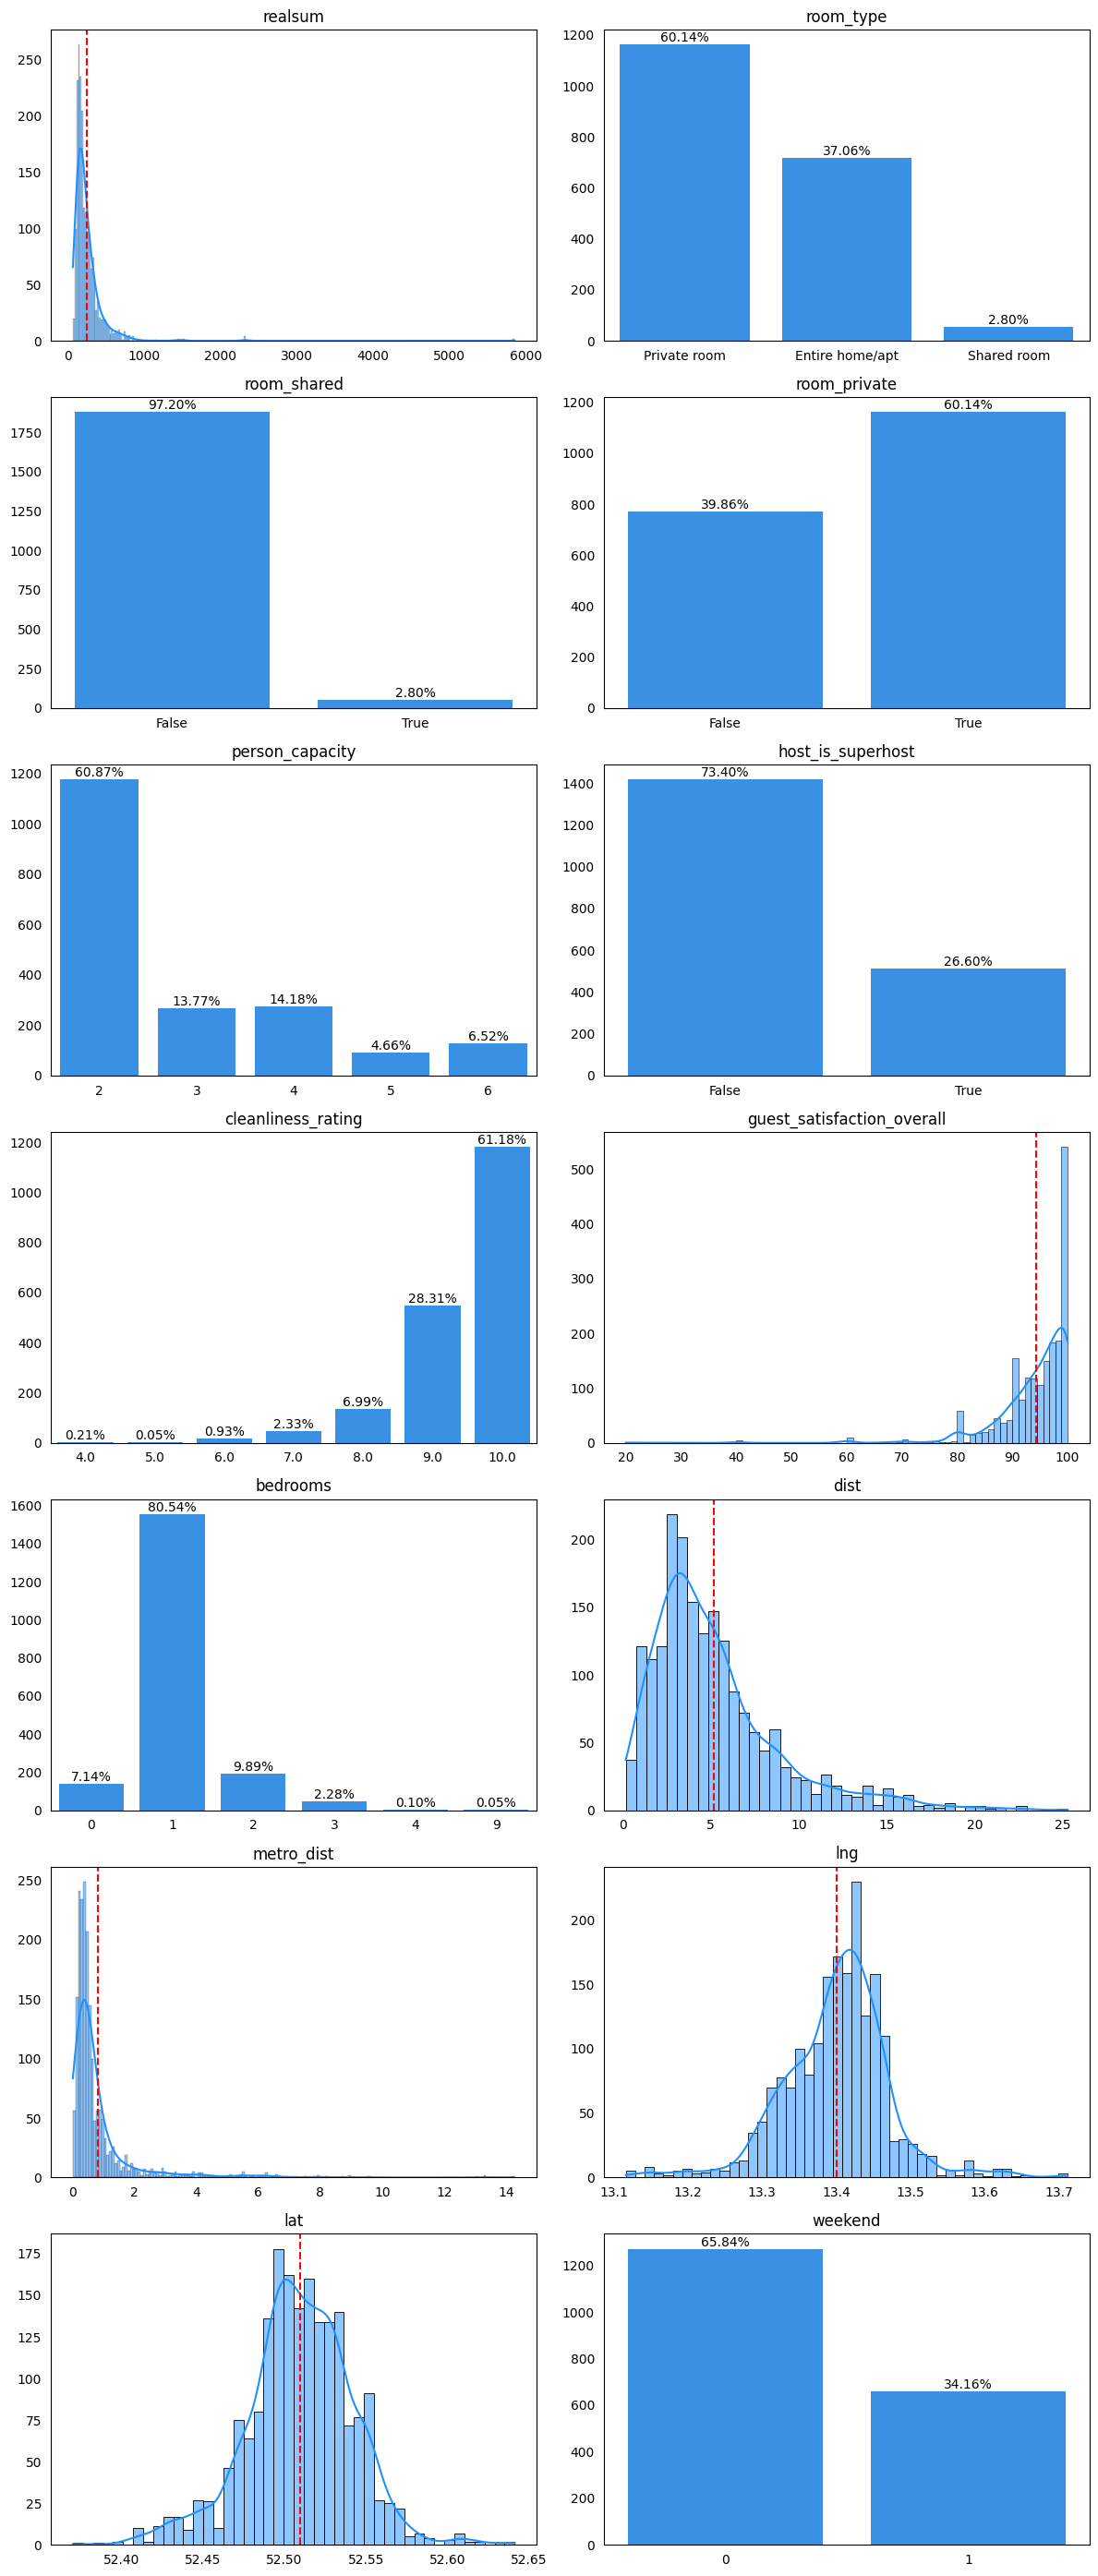

In [34]:
basic_data_preprocessing(df)

1.

* **Data Size**: Dataset contains 1932 records and 14 columns.
* **Data Types**: Most columns have appropriate data types for their content. It is necessary to encode the 'room_type' column to get rid of the object data type.
* **Missing Values**: There are no missing values in the dataset, allowing for analysis without additional preprocessing in this regard.
* **Zero Values**: There are zero values in several columns, such as 'room_shared', 'room_private', 'host_is_superhost', 'bedrooms', and 'weekend'. It is worth paying attention to 'bedrooms' during analysis to understand the reasons and potential implications.
* **Duplicates**: No duplicates are found in the dataset, indicating its relative cleanliness.
* **Negative Values**: There are no negative values, as expected.




*The distribution of realsum based on the plot:*

**realsum**:
- The distribution of realsum appears to be right-skewed (positively skewed).
Most values cluster towards the lower end, with a long tail extending towards higher values.
- This suggests that there are more low-priced listings, but some expensive outliers exist.



Overall, the data appears clean and ready for further analysis. Specifically, attention may be warranted on column with zero values ('bedroom') to better understand their significance.

In [35]:
# Check zero values in 'bedrooms'

df[df['bedrooms'] == 0]

realsum        room_type  room_shared  room_private  person_capacity  \
32    202.860615  Entire home/apt        False         False                3   
73    194.680752  Entire home/apt        False         False                3   
97    226.231654  Entire home/apt        False         False                5   
112   388.426662  Entire home/apt        False         False                4   
118   128.774423     Private room        False          True                2   
...          ...              ...          ...           ...              ...   
943   202.860615     Private room        False          True                3   
950   324.390016  Entire home/apt        False         False                3   
1065  146.302702     Private room        False          True                2   
1113  286.295223  Entire home/apt        False         False                3   
1180  173.880527  Entire home/apt        False         False                2   

      host_is_superhost  cleanliness_rating  guest_satisfaction_overall  \
32                False                 8.0                        80.0   
73                False                 9.0                        93.0   
97                False                10.0                        99.0   
112                True                10.0                        98.0   
118                True                10.0                        97.0   
...                 ...                 ...                         ...   
943               False                 9.0                       100.0   
950               False                10.0                       100.0   
1065               True                 9.0                        96.0   
1113              False                10.0                        95.0   
1180              False                10.0                       100.0   

      bedrooms       dist  metro_dist       lng       lat  weekend  
32           0   5.445713    0.412160  13.34800  52.49800        0  
73           0   5.408402    0.292110  13.34311  52.50457        0  
97           0   9.407125    0.562035  13.31800  52.46400        0  
112          0   1.995532    0.372387  13.39753  52.50975        0  
118          0   8.087903    0.310699  13.30525  52.49748        0  
...        ...        ...         ...       ...       ...      ...  
943          0   0.818407    0.292619  13.40462  52.52238        1  
950          0   0.756135    0.110472  13.40866  52.52822        1  
1065         0   3.004488    0.142467  13.41525  52.55042        1  
1113         0  17.653737    2.959554  13.15682  52.53269        1  
1180         0   9.079524    0.222133  13.38573  52.44401        1  

[138 rows x 14 columns]

It was not possible to establish unambiguous relationships with the value 0. It is quite possible that the information is just missing.
This column does not greatly influence the analysis and solution of the assigned tasks, so it was decided to leave the data without changes.

In [36]:
# Encode categorical feature
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)
df.head(3)

realsum  room_shared  room_private  person_capacity  host_is_superhost  \
0  185.799757        False          True                2               True   
1  194.914462        False          True                5              False   
2  176.217631        False          True                2              False   

   cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0                10.0                        98.0         1  3.582211   
1                 9.0                        86.0         1  3.525410   
2                 9.0                        91.0         1  3.801713   

   metro_dist       lng       lat  weekend  room_type_Private room  \
0    0.174706  13.42344  52.49150        0                    True   
1    0.511922  13.46800  52.51900        0                    True   
2    0.281397  13.47096  52.51527        0                    True   

   room_type_Shared room  
0                  False  
1                  False  
2                  False

In [37]:
# rename room_type_Private room	room_type_Shared room into private_room	and shared_room

df = df.rename(columns={'room_type_Private room': 'private_room', 'room_type_Shared room': 'shared_room'})

### Outliers

Outliers in column 'realsum':
Outlier Count: 123
Outlier Percentage of total observations: 6.37%
Outlier Values: 577.4983640272973, 904.6929045526782, 644.80695522109, 519.538188277087, 654.6227914368513, 695.7558193886135, 652.0519771898663, 624.0067308591193, 725.9044591941665, 660.9329718612695, 797.6535477236607, 611.1526596241937, 588.0153314013274, 644.80695522109, 539.1698607086098, 794.381602318407, 530.9899971954753, 554.3610358044311, 670.2813873048518, 1449.4718145274376, 505.5155651117135, 587.7816210152379, 564.8780031784612, 533.3271010563709, 614.4246050294474, 1159.437225390296, 742.030475834346, 742.030475834346, 611.1526596241937, 1507.431990277648, 745.7698420117789, 545.0126203608488, 730.3449565298681, 637.7956436384032, 913.5738992240814, 520.7067402075347, 755.3519678414508, 808.4042254837805, 505.5155651117135, 786.435449191362, 605.3098999719547, 539.1698607086098, 695.7558193886135, 624.9415724034776, 1380.0598298588388, 542.6755164999532, 534.4956529868186, 8

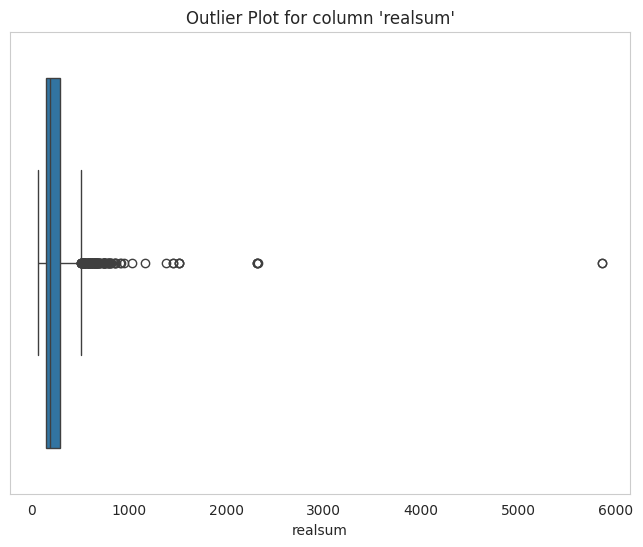

***************************************************************************

No outliers in column 'room_shared' as it has binary values.
***************************************************************************

No outliers in column 'room_private' as it has binary values.
***************************************************************************

No outliers in column 'person_capacity'.
***************************************************************************

No outliers in column 'host_is_superhost' as it has binary values.
***************************************************************************

Outliers in column 'cleanliness_rating':
Outlier Count: 68
Outlier Percentage of total observations: 3.52%
Outlier Values: 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 4.0, 7.0, 5.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 4.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 4.0, 7.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6

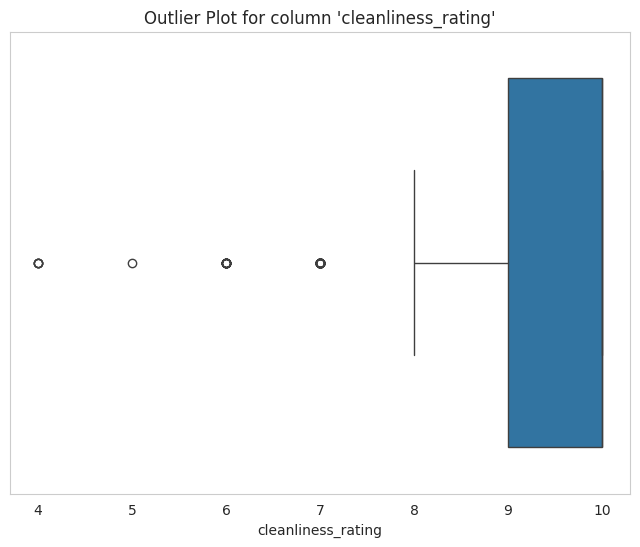

***************************************************************************

Outliers in column 'guest_satisfaction_overall':
Outlier Count: 96
Outlier Percentage of total observations: 4.97%
Outlier Values: 80.0, 80.0, 60.0, 78.0, 70.0, 80.0, 80.0, 81.0, 76.0, 80.0, 71.0, 79.0, 40.0, 80.0, 80.0, 80.0, 70.0, 80.0, 80.0, 69.0, 71.0, 60.0, 80.0, 40.0, 70.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 81.0, 80.0, 81.0, 80.0, 80.0, 79.0, 80.0, 60.0, 80.0, 67.0, 80.0, 40.0, 80.0, 70.0, 20.0, 80.0, 60.0, 60.0, 80.0, 80.0, 80.0, 60.0, 77.0, 80.0, 80.0, 75.0, 80.0, 80.0, 60.0, 80.0, 80.0, 78.0, 81.0, 70.0, 80.0, 76.0, 80.0, 80.0, 76.0, 67.0, 80.0, 80.0, 80.0, 80.0, 80.0, 81.0, 79.0, 60.0, 80.0, 40.0, 60.0, 73.0, 80.0, 80.0, 60.0, 80.0, 80.0, 81.0, 75.0, 80.0, 80.0, 80.0


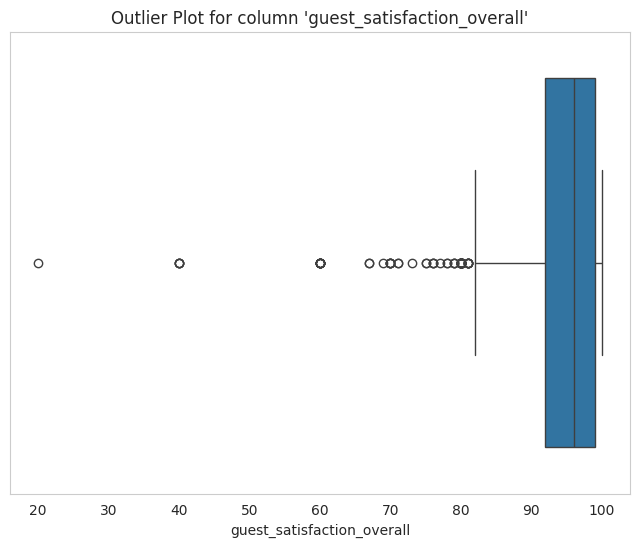

***************************************************************************

Outliers in column 'bedrooms':
Outlier Count: 376
Outlier Percentage of total observations: 19.46%
Outlier Values: 2, 2, 2, 2, 0, 3, 3, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 9, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 3, 0, 2, 2, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 2, 4, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 3, 3, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 2, 2, 0, 0, 3, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 2, 2, 0, 0, 2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 3, 2, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 0, 0, 2, 2, 4, 2, 3, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2

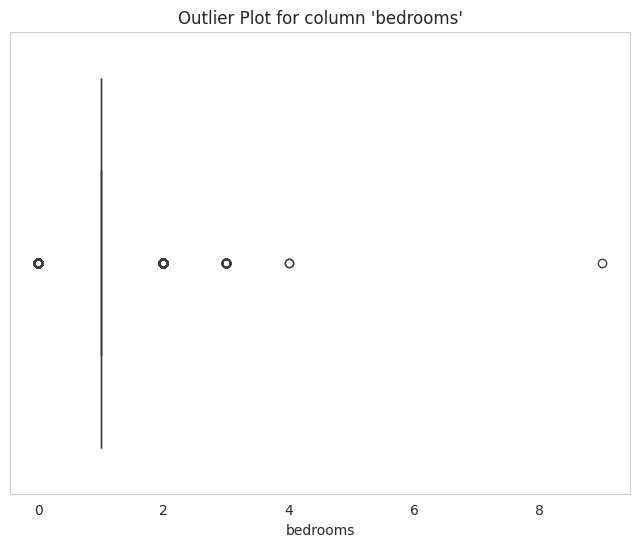

***************************************************************************

Outliers in column 'dist':
Outlier Count: 124
Outlier Percentage of total observations: 6.42%
Outlier Values: 13.62054945396812, 13.846346364219896, 13.627397780281434, 16.45966648587442, 12.634585487321504, 12.912668489058252, 13.50750294825502, 13.939761399965652, 12.067028735297194, 14.647749083829796, 13.105431731795056, 12.1667382078991, 13.831834345690442, 13.475693960846518, 14.757536539542428, 16.895526196613552, 16.0539250232139, 15.016248856273377, 15.365517229001478, 13.67409157414346, 14.04379971163096, 15.84735954954509, 14.78256732176425, 13.08354579866016, 12.976692716957508, 15.422942430599656, 15.96026829389208, 16.429284633811694, 14.81886079210348, 14.89231102360132, 12.8117884537718, 12.675608983068685, 12.481975608894926, 12.179741387122034, 12.635033889346191, 12.545144360773648, 15.497699185461752, 12.606871601497446, 13.660181350640586, 15.359640284872771, 18.674430074459494, 14.8867959

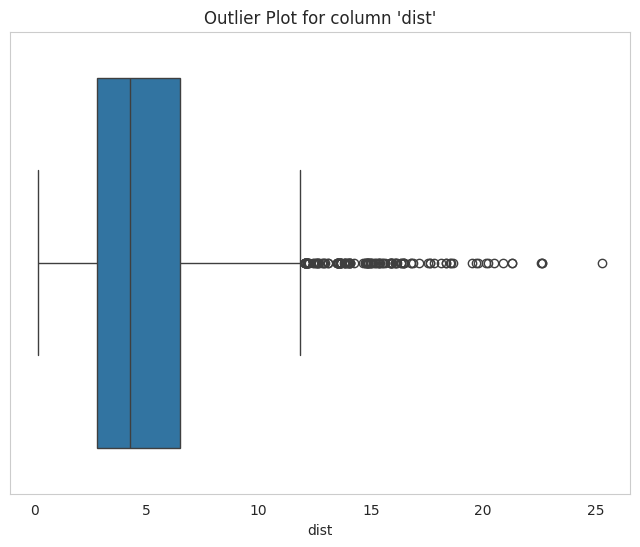

***************************************************************************

Outliers in column 'metro_dist':
Outlier Count: 207
Outlier Percentage of total observations: 10.71%
Outlier Values: 2.1871882566567384, 5.514004440826071, 2.6946382213132183, 3.229985869569345, 5.488170272188548, 1.690358587476368, 3.3962963302751032, 4.327186659207041, 1.8882106092923607, 1.7554839255158807, 1.832634130927316, 1.634300976835677, 2.7865536310265355, 4.151617220681039, 2.024229059664261, 3.091410030683748, 3.018013562676769, 2.2639045795063373, 1.871249556574176, 1.7832307689170706, 1.6905889838834445, 3.71237040040308, 4.597264651065028, 4.106835913377321, 3.9356603233908887, 2.07692306434172, 1.7584771937210348, 1.619068465237935, 1.7490489515484808, 5.455034117633234, 4.258359933421337, 3.1662786552556907, 2.2920899114532114, 2.67214598113713, 1.6922204469010969, 3.2514954299015977, 1.954534249279952, 2.0222420561437624, 2.770258239582553, 2.760423813791287, 4.163867115659261, 5.48302296676

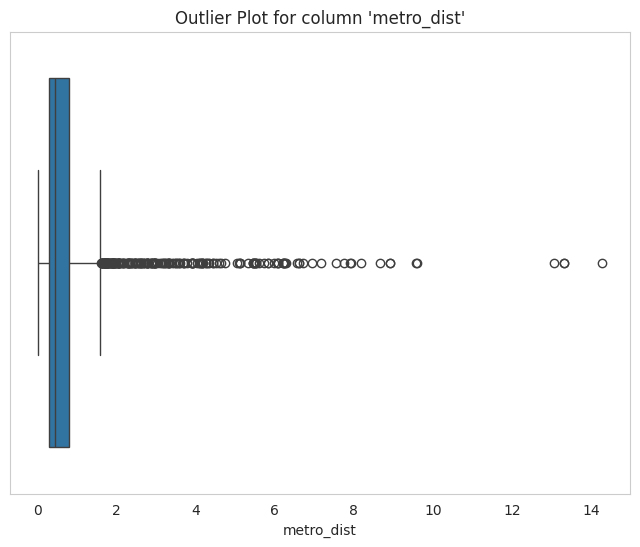

***************************************************************************

Outliers in column 'lng':
Outlier Count: 84
Outlier Percentage of total observations: 4.35%
Outlier Values: 13.58363, 13.21446, 13.58425, 13.19183, 13.582870000000002, 13.58005, 13.23285, 13.57979, 13.566820000000002, 13.21891, 13.21301, 13.23875, 13.63235, 13.5596, 13.60965, 13.59554, 13.57562, 13.6204, 13.634, 13.635279999999998, 13.623679999999998, 13.6142, 13.643, 13.6176, 13.62227, 13.6501, 13.59696, 13.58449, 13.61437, 13.62419, 13.63491, 13.5821, 13.22258, 13.19024, 13.14401, 13.20041, 13.236, 13.196129999999998, 13.18322, 13.2101, 13.156820000000002, 13.19943, 13.23308, 13.116320000000002, 13.1474, 13.14625, 13.124, 13.15359, 13.14459, 13.12703, 13.1214, 13.176420000000002, 13.15772, 13.143820000000002, 13.22805, 13.1928, 13.18997, 13.19742, 13.234000000000002, 13.707020000000002, 13.58363, 13.58425, 13.58005, 13.57979, 13.59554, 13.57562, 13.6204, 13.634, 13.71185, 13.5672, 13.6176, 13.6501, 13.20041,

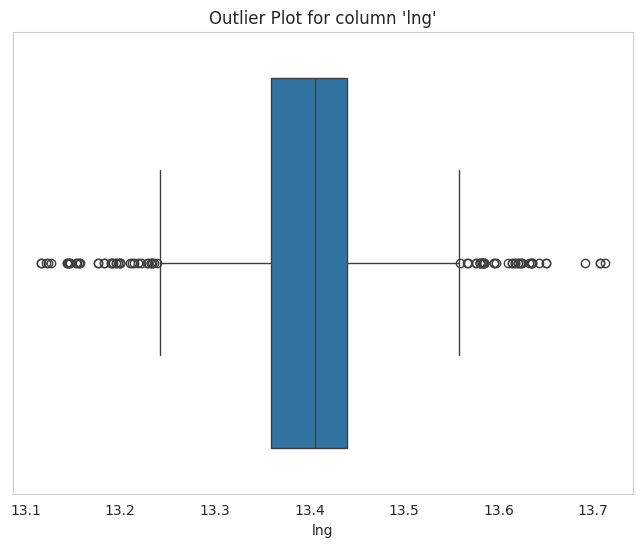

***************************************************************************

Outliers in column 'lat':
Outlier Count: 62
Outlier Percentage of total observations: 3.21%
Outlier Values: 52.61597, 52.60997, 52.6208, 52.60762, 52.60921999999999, 52.6008, 52.60825, 52.63311, 52.43012, 52.40845, 52.41019, 52.41194, 52.43039, 52.43046, 52.42207, 52.41, 52.410790000000006, 52.40017, 52.60025, 52.42663, 52.619130000000006, 52.64141, 52.63967, 52.61588, 52.42709, 52.42501, 52.41554, 52.42971, 52.42337, 52.42068, 52.42129, 52.42845, 52.42031, 52.43021, 52.382940000000005, 52.43036, 52.41233, 52.428, 52.40712, 52.42405, 52.603, 52.60762, 52.60921999999999, 52.63429, 52.60825, 52.42992, 52.42667, 52.42329, 52.43039, 52.43046, 52.42207, 52.410790000000006, 52.42166, 52.42663, 52.41266, 52.43, 52.41554, 52.428, 52.4, 52.40874, 52.42405, 52.37


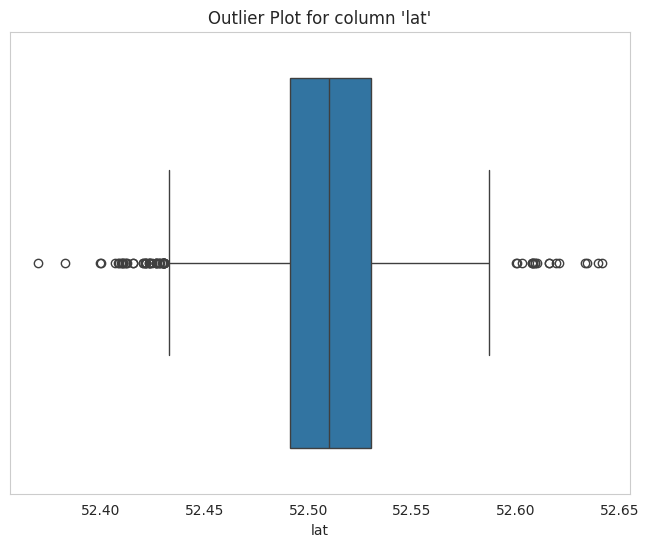

***************************************************************************

No outliers in column 'weekend' as it has binary values.
***************************************************************************

No outliers in column 'private_room' as it has binary values.
***************************************************************************

No outliers in column 'shared_room' as it has binary values.
***************************************************************************



Column Outlier Count Outlier Percentage
0                      realsum           123            6.36646
1                  room_shared           NaN                NaN
2                 room_private           NaN                NaN
3              person_capacity             0                  0
4            host_is_superhost           NaN                NaN
5           cleanliness_rating            68           3.519669
6   guest_satisfaction_overall            96           4.968944
7                     bedrooms           376          19.461698
8                         dist           124           6.418219
9                   metro_dist           207          10.714286
10                         lng            84           4.347826
11                         lat            62            3.20911
12                     weekend           NaN                NaN
13                private_room           NaN                NaN
14                 shared_room           NaN                NaN

In [39]:
detect_outliers(df)


Based on the outlier analysis, here are some conclusions:


**room_shared**, **room_private**, **host_is_superhost, weekend, private_room and shared_room**: bool type.

**person_capacity**: No outliers were detected in this column.

**realsum**: There are 123 outliers, which represent approximately 6.37% of the data in this column.

**cleanliness_rating**: There are 68 outliers, making up around 3.52% of the data in this column.

**guest_satisfaction_overall**: There are 96 outliers, constituting approximately 4.97% of the data.

**bedrooms**: This column has 376 outliers, which represent a substantial 19.46% of the data. The reason for that is that the majority of apartments/houses have 1 bedroom.

**dist**: There are 124 outliers, making up about 6.42% of the data in this column.

**metro_dist**: 207 outliers were detected, accounting for roughly 10.71% of the data.

**lng**: There are 84 outliers, representing around 4.35% of the data.

**lat**: 62 outliers were detected, constituting approximately 3.21% of the data.


### Correlations

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

### EDA

In [ ]:
berlin_df.groupby('room_type', as_index=False).agg({'realSum':'median'})

room_type     realSum
0  Entire home/apt  295.643638
1     Private room  160.091614
2      Shared room  148.406095

In [ ]:
round(berlin_df.groupby('room_type')['realSum'].aggregate(['median', 'min', 'max']),2)

median     min      max
room_type                               
Entire home/apt  295.64  111.25  5857.48
Private room     160.09   64.97  2319.34
Shared room      148.41   75.02   417.64

In [ ]:
round(berlin_df.groupby(['room_type', 'person_capacity'])['realSum'].aggregate(['median', 'min', 'max']),2)

median     min      max
room_type       person_capacity                         
Entire home/apt 2                254.98  111.25  1507.43
                3                276.01  122.93   765.17
                4                324.62  157.75  2317.00
                5                358.51  161.03  1029.49
                6                458.07  157.52  5857.48
Private room    2                154.02   64.97  1159.44
                3                168.27   92.78  2319.34
                4                189.31   92.78   622.60
                5                173.88  113.58   319.95
                6                287.70  138.12   426.76
Shared room     2                133.45   81.33   300.32
                3                138.59  136.95   140.23
                4                150.04  125.27   417.64
                5                120.48  101.66   164.53
                6                143.73   75.02   208.70

мультипликаторы по заполняемости можно погуглить

Shared room - стоимость нужно еще поделить на количество человек. При этом комната может быть заполнена не полностью, следовательно выручка за нось будет ниже заявленной в таблице.

Private room - есть большие варианты на 4 и более человек, но они могут быть непопулярными, высока вероятность простоев (особенно в не сезон). На 2 и 3 человека Private room имеют наиболее высокую стоимость.

Entire home/apt

- # Анализ dist, metro_dist и геолокации









<Axes: >

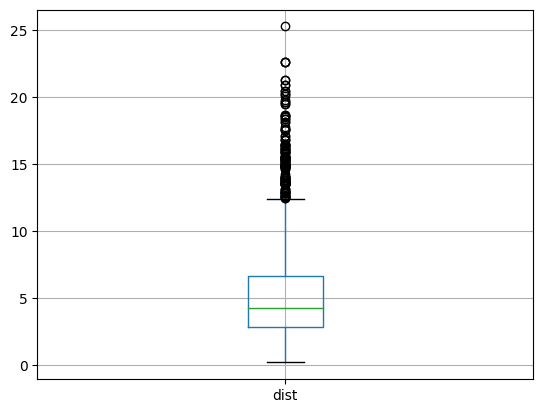

In [ ]:
# выбросы для dist
berlin_df.boxplot(['dist'])

<Axes: >

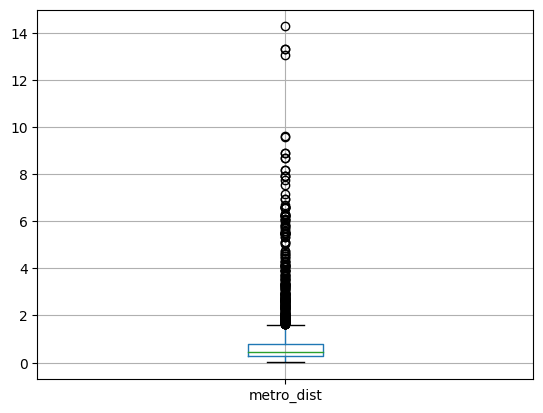

In [ ]:
# выбросы для metro_dist
berlin_df.boxplot(['metro_dist'])

In [ ]:
# матрица корреляции для всех столбцов
berlin_df.corr()

<ipython-input-24-5f9c0c49a219>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  berlin_df.corr()


id   realSum  room_shared  room_private  \
id                          1.000000  0.005567    -0.044434      0.005658   
realSum                     0.005567  1.000000    -0.067590     -0.344528   
room_shared                -0.044434 -0.067590     1.000000     -0.220173   
room_private                0.005658 -0.344528    -0.220173      1.000000   
person_capacity            -0.028852  0.312270     0.215564     -0.440222   
host_is_superhost          -0.068089  0.021214    -0.069685      0.076997   
cleanliness_rating          0.029422  0.045257    -0.103035      0.032135   
guest_satisfaction_overall  0.013309  0.007342    -0.104206      0.071852   
bedrooms                   -0.012154  0.260298    -0.022211     -0.130027   
dist                        0.236876 -0.137852    -0.085016      0.059925   
metro_dist                  0.182770 -0.093406    -0.021788     -0.012762   
lng                        -0.168505 -0.058960     0.041226      0.022694   
lat                         0.051708  0.065903     0.045393     -0.091122   
weekday                     0.058339 -0.019183    -0.013043     -0.025425   

                            person_capacity  host_is_superhost  \
id                                -0.028852          -0.068089   
realSum                            0.312270           0.021214   
room_shared                        0.215564          -0.069685   
room_private                      -0.440222           0.076997   
person_capacity                    1.000000          -0.066055   
host_is_superhost                 -0.066055           1.000000   
cleanliness_rating                -0.126857           0.245033   
guest_satisfaction_overall        -0.143367           0.260165   
bedrooms                           0.368039           0.025000   
dist                              -0.054245           0.038489   
metro_dist                        -0.001150           0.010192   
lng                                0.035903          -0.002777   
lat                                0.071973          -0.014782   
weekday                            0.021669           0.021555   

                            cleanliness_rating  guest_satisfaction_overall  \
id                                    0.029422                    0.013309   
realSum                               0.045257                    0.007342   
room_shared                          -0.103035                   -0.104206   
room_private                          0.032135                    0.071852   
person_capacity                      -0.126857                   -0.143367   
host_is_superhost                     0.245033                    0.260165   
cleanliness_rating                    1.000000                    0.588026   
guest_satisfaction_overall            0.588026                    1.000000   
bedrooms                              0.036240                    0.048037   
dist                                  0.057483                    0.062015   
metro_dist                            0.001605                    0.013291   
lng                                  -0.044261                   -0.017060   
lat                                  -0.043343                   -0.040445   
weekday                               0.016228                   -0.003739   

                            bedrooms      dist  metro_dist       lng  \
id                         -0.012154  0.236876    0.182770 -0.168505   
realSum                     0.260298 -0.137852   -0.093406 -0.058960   
room_shared                -0.022211 -0.085016   -0.021788  0.041226   
room_private               -0.130027  0.059925   -0.012762  0.022694   
person_capacity             0.368039 -0.054245   -0.001150  0.035903   
host_is_superhost           0.025000  0.038489    0.010192 -0.002777   
cleanliness_rating          0.036240  0.057483    0.001605 -0.044261   
guest_satisfaction_overall  0.048037  0.062015    0.013291 -0.017060   
bedrooms                    1.000000  0.001607   -0.011900  0.001467

<ipython-input-25-52ee4bdcc094>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(berlin_df.corr())


<Axes: >

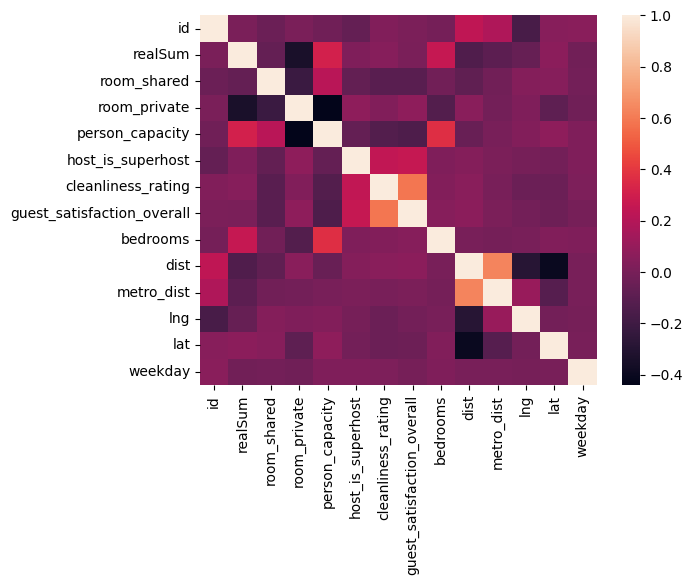

In [ ]:
# график корреляции для всех столбцов
import seaborn as sns
sns.heatmap(berlin_df.corr())

Судя по таблице и грфику корреляцмм, переменная realSum практически не имеет взаимосвязей с другими переменными. И в целом между собой переменные имеют слабую связь. Связь с коэфициентом около 0.6 наблюдается только между dist и metro_dist; и cleanliness_rating  и guest_datisfaction_overall

## Переменные dist и metro_dist

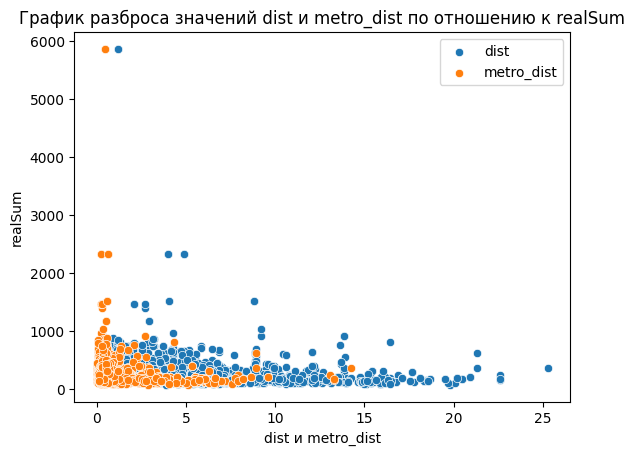

In [ ]:
# График разброса значений 'dist' и 'metro_dist' по отношению к 'realSum'

import seaborn as sns
import matplotlib.pyplot as plt

# Построение графика разброса
sns.scatterplot(x='dist', y='realSum', data=berlin_df, label='dist')
sns.scatterplot(x='metro_dist', y='realSum', data=berlin_df, label='metro_dist')

# Настройка заголовка и меток осей
plt.title('График разброса значений dist и metro_dist по отношению к realSum')
plt.xlabel('dist и metro_dist')
plt.ylabel('realSum')

plt.show()

Судя по графику, взаимосвязь между переменными dist и realSum; и metro_dist и realSum слабая => отдаленность от центра или от метро не является важным факторов формирования стоимости аренды

In [ ]:
# Коэффициенты корреляции Пирсона, Спирмена, Кендалла между dist и realSum
from scipy import stats

pearson_dist = stats.pearsonr(berlin_df["realSum"], berlin_df["dist"]).correlation
spearman_dist = stats.spearmanr(berlin_df["realSum"], berlin_df["dist"]).correlation
kendall_dist = stats.kendalltau(berlin_df["realSum"], berlin_df["dist"]).correlation

print(f'Коэффициент Пирсона между dist и realSum: {pearson_dist}')
print(f'Коэффициент Спирмена между dist и realSum: {spearman_dist}')
print(f'Коэффициент Кендалла между dist и realSum: {kendall_dist}')

Коэффициент Пирсона между dist и realSum: -0.13785228461032364
Коэффициент Спирмена между dist и realSum: -0.2924177298884005
Коэффициент Кендалла между dist и realSum: -0.19862550994310801


In [ ]:
# Коэффициенты корреляции Пирсона, Спирмена, Кендалла между metro_dist и realSum
from scipy import stats

pearson_metro_dist = stats.pearsonr(berlin_df["realSum"], berlin_df["metro_dist"]).correlation
spearman_metro_dist = stats.spearmanr(berlin_df["realSum"], berlin_df["metro_dist"]).correlation
kendall_metro_dist = stats.kendalltau(berlin_df["realSum"], berlin_df["metro_dist"]).correlation

print(f'Коэффициент Пирсона между dist и realSum: {pearson_metro_dist}')
print(f'Коэффициент Спирмена между dist и realSum: {spearman_metro_dist}')
print(f'Коэффициент Кендалла между dist и realSum: {kendall_metro_dist}')

Коэффициент Пирсона между dist и realSum: -0.09340605008164436
Коэффициент Спирмена между dist и realSum: -0.2469606643989638
Коэффициент Кендалла между dist и realSum: -0.16691622287272057


Коэфициенты говорят о слабой отрицательной связи между dist и realSum; и metro_dist и realSum

Разобьём переменные dist и metro_dist на интервалы по децилям. В каждом интервале для переменной realSum определим: среднее, медиану, мин., макс. Также можно принять во внимание типы жилья и количество человек, способных разместиться в апартаментах



In [ ]:
# разбиваем dist и metro_dist на интервалы по децелям


# Находим децели для dist и metro_dist
deciles_dist = [berlin_df['dist'].quantile(i/10) for i in range(1, 11)]
deciles_metro_dist = [berlin_df['metro_dist'].quantile(i/10) for i in range(1, 11)]

# Определяем границы интервалов
intervals_dist = [berlin_df['dist'].min()] + deciles_dist
intervals_metro_dist = [berlin_df['metro_dist'].min()] + deciles_metro_dist


# Разбиваем переменные на интервалы
berlin_df['dist_interval'] = pd.cut(berlin_df['dist'], intervals_dist, include_lowest = True)
berlin_df['metro_dist_interval'] = pd.cut(berlin_df['metro_dist'], intervals_metro_dist, include_lowest = True)

# Удаляем скобки из значений столбцов dist_interval и metro_dist_interval и добавляем "-" в интервалы
berlin_df['dist_interval'] = berlin_df['dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')
berlin_df['metro_dist_interval'] = berlin_df['metro_dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')
# Выводим датафрейм с интервалами
berlin_df.head()

<ipython-input-29-3a057205fa8a>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  berlin_df['dist_interval'] = berlin_df['dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')
<ipython-input-29-3a057205fa8a>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  berlin_df['metro_dist_interval'] = berlin_df['metro_dist_interval'].astype(str).str.replace('(', '').str.replace(')', '').str.replace(',', ' - ').str.replace(']', '')


id     realSum     room_type  room_shared  room_private  person_capacity  \
0   0  185.799757  Private room        False          True                2   
1   1  194.914462  Private room        False          True                5   
2   2  176.217631  Private room        False          True                2   
3   3  207.768533  Private room        False          True                3   
4   4  150.743199  Private room        False          True                2   

   host_is_superhost  cleanliness_rating  guest_satisfaction_overall  \
0               True                10.0                        98.0   
1              False                 9.0                        86.0   
2              False                 9.0                        91.0   
3               True                10.0                        97.0   
4              False                10.0                        99.0   

   bedrooms      dist  metro_dist       lng       lat  weekday  \
0         1  3.582211    0.174706  13.42344  52.49150        1   
1         1  3.525410    0.511922  13.46800  52.51900        1   
2         1  3.801713    0.281397  13.47096  52.51527        1   
3         1  0.982408    0.705573  13.42281  52.53139        1   
4         1  8.869697    2.187188  13.52440  52.47842        1   

    dist_interval metro_dist_interval  
0  3.091 -  3.599      0.171 -  0.245  
1  3.091 -  3.599       0.45 -  0.536  
2  3.599 -  4.283      0.245 -  0.313  
3   0.18 -  1.643      0.666 -  0.945  
4  7.411 -  9.954     1.749 -  14.274

In [ ]:
# Таблица значений по интервалам и количеству людей в номере для dist_inerval
berlin_df.groupby(['dist_interval', 'person_capacity'])["realSum"].aggregate(['min', 'max', 'mean','median', 'count'])

min          max        mean  \
dist_interval   person_capacity                                        
0.18 -  1.643   2                127.605871   844.161915  282.865813   
                3                157.520800   521.875292  248.539310   
                4                143.731887   542.675516  293.929762   
                5                126.437319   663.503786  368.525323   
                6                129.942975  5857.483407  677.591329   
1.643 -  2.538  2                102.131439  1449.471815  268.080151   
                3                120.828270   765.167804  275.052947   
                4                133.214920   660.699261  318.173320   
                5                139.291390   614.424605  352.753958   
                6                139.291390   742.030476  473.380387   
2.538 -  3.091  2                109.142750  1159.437225  210.162904   
                3                139.291390   347.761055  240.628214   
                4                157.520800   794.381602  307.669707   
                5                150.743199   611.152660  374.489024   
                6                182.060391  1449.004394  518.158184   
3.091 -  3.599  2                 91.614471   481.209685  193.173892   
                3                116.154062   415.069646  279.099776   
                4                113.583248   530.989997  296.116253   
                5                194.914462   394.269421  293.252601   
                6                242.357670   858.184538  487.893802   
3.599 -  4.283  2                 64.971487  1507.431990  195.984461   
                3                122.931663   487.052445  233.266336   
                4                142.797046  2317.004768  459.942040   
                5                101.664018   670.281387  288.356124   
                6                231.840703   730.578667  455.657349   
4.283 -  5.19   2                 86.940264   405.954941  171.899007   
                3                133.214920  2319.341872  343.291343   
                4                145.367860   624.006731  303.297654   
                5                278.349070   620.267365  383.168178   
                6                 75.021034   950.733851  439.719218   
5.19 -  6.003   2                 71.982799   738.524820  189.093699   
                3                116.154062   695.755819  248.660977   
                4                139.291390   417.640460  251.085854   
                5                182.060391   588.716463  275.726320   
                6                266.663551   532.392260  384.196504   
6.003 -  7.411  2                 81.331214   404.318968  171.424183   
                3                108.909040   322.286622  177.535997   
                4                111.246144   463.915116  261.204744   
                5                114.050668   670.281387  329.274563   
                6                274.843414   674.721885  395.391231   
7.411 -  9.954  2                 91.614471  1507.431990  190.766470   
                3                 92.783023   423.249509  202.680021   
                4                125.268767   577.264654  274.453897   
                5                182.995232  1029.494251  521.012361   
                6                138.122838   327.194541  239.927082   
9.954 -  25.285 2                 69.645695   904.692905  159.414170   
                3                102.131439   577.498364  190.931648   
                4                 92.783023   637.795644  226.516488   
                5                161.026456   746.938394  309.645015   
                6                157.520800   797.653548  354.141348   

                                     median  count  
dist_interval   person_capacity                     
0.18 -  1.643   2                238.618304    141  
                3                205.314574     20  
                4                299.149294     39  
                5             

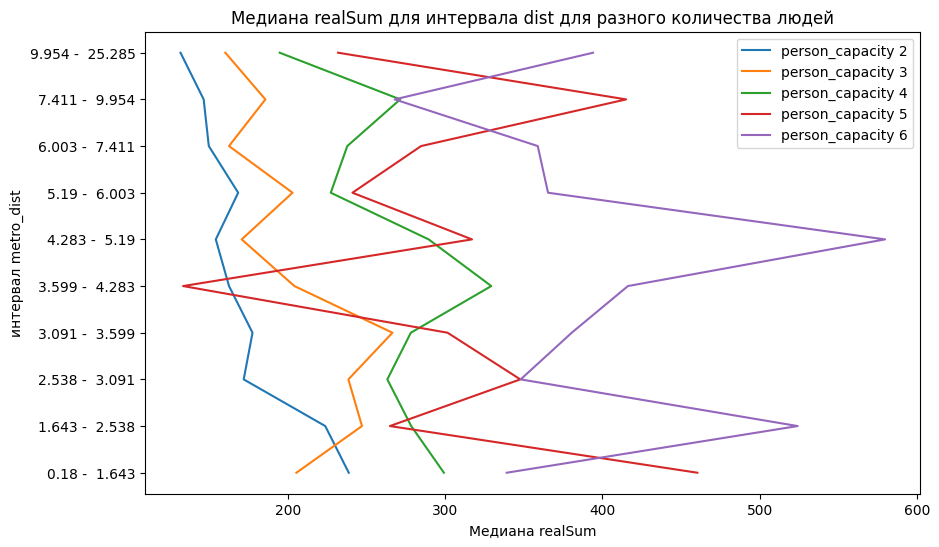

In [ ]:
# График медианы realSum для интервалов dist для разного количества людей
import matplotlib.pyplot as plt

person_capacity_list = [2, 3, 4, 5, 6]

plt.figure(figsize=(10, 6))

for person_capacity in person_capacity_list:
    filtered_df = berlin_df[(berlin_df['person_capacity'] == person_capacity)]
    grouped_df = filtered_df.groupby(['dist_interval'])["realSum"].median().reset_index()

    plt.plot(grouped_df['realSum'], grouped_df['dist_interval'], label=f'person_capacity {person_capacity}')

plt.xlabel('Медиана realSum')
plt.ylabel('интервал metro_dist')
plt.title('Медиана realSum для интервала dist для разного количества людей')
plt.legend()
plt.show()

Судя по данным, меддианная цена аренды квартиры/дома для 2-х человек постепенно снижается по мере отдаления от центра;

для 3-х человек до 3.6 км от центра цена аренды увеличиывется, далее по мере отдаления цена начинает снижаться;

для 4-х человек до 3-х километров от центра медианная стоимость снижается, далее на расстоянии от 3-х до 4.2 км повышается, и далее постепенно снижается;

для 5-х человек по мере отдаления до 4.2 км резко снижается и далее постепенно повышается до показателей максимально приближенных к центру;

для 6-х до 2.5 км от центра цена аренды увеличиывется, далее по мере отдаления цена начинает снижаться, далее в интервале 4.2 - 5.2 возрастает до максимума, далее начинает снижаться до расстаяния в 10км, и в интервале 10 км - 25 немного вырастает;

In [ ]:
berlin_df['metro_dist']

0        0.174706
1        0.511922
2        0.281397
3        0.705573
4        2.187188
          ...    
1195     4.070691
1196     2.620839
1197     2.754838
1198    13.314115
1199    14.273577
Name: metro_dist, Length: 2484, dtype: float64

In [ ]:
# Таблица значений по интервалам и количеству людей в номере для metro_dist_inerval
berlin_df.groupby(['metro_dist_interval', 'person_capacity'])["realSum"].aggregate(['min', 'max', 'mean','median', 'count'])

min          max        mean  \
metro_dist_interval person_capacity                                        
0.0104 -  0.171     2                 92.549313   844.161915  248.039754   
                    3                113.583248   521.875292  277.654813   
                    4                148.406095   542.675516  350.331869   
                    5                101.664018   577.498364  340.282322   
                    6                254.978031   808.404225  462.499870   
0.171 -  0.245      2                 95.120127  1449.471815  247.933742   
                    3                149.808357  2319.341872  347.253339   
                    4                111.246144   794.381602  363.012016   
                    5                113.583248   353.603814  239.973824   
                    6                272.506310   950.733851  541.799103   
0.245 -  0.313      2                 81.331214   738.524820  203.413917   
                    3                147.237543   370.898383  236.925674   
                    4                153.080303   505.515565  309.752365   
                    5                114.050668   458.072357  324.062821   
                    6                162.428718  1449.004394  559.619519   
0.313 -  0.376      2                 71.982799   504.580724  204.211494   
                    3                120.828270   487.052445  236.068736   
                    4                117.790035   660.699261  314.852406   
                    5                128.540712  1029.494251  437.521423   
                    6                148.406095   858.184538  496.777393   
0.376 -  0.45       2                 83.434608   519.538188  197.296155   
                    3                110.311302   660.932972  216.705941   
                    4                119.426007   637.795644  293.182806   
                    5                133.214920   663.503786  337.294168   
                    6                129.942975   649.247453  358.843847   
0.45 -  0.536       2                 81.331214  1159.437225  211.817000   
                    3                122.931663   765.167804  255.482846   
                    4                139.057680   487.052445  253.143405   
                    5                194.914462   620.267365  354.830794   
                    6                143.731887  5857.483407  930.739927   
0.536 -  0.666      2                 91.848182  1507.431990  210.855331   
                    3                124.100215   695.755819  255.645775   
                    4                133.214920  2317.004768  357.526810   
                    5                126.437319   670.281387  378.462101   
                    6                138.122838   864.027297  370.614592   
0.666 -  0.945      2                 83.668318   347.761055  171.648822   
                    3                133.214920   353.603814  211.573948   
                    4                126.437319   521.875292  308.470743   
                    5                146.302702   611.152660  328.830513   
                    6                 79.928952   426.755165  212.699822   
0.945 -  1.749      2                 81.331214   347.994765  162.086917   
                    3                 92.783023   577.498364  206.822563   
                    4                 92.783023   472.094980  239.376092   
                    5                155.417407   680.798355  463.136082   
                    6                 75.021034   742.030476  445.585545   
1.749 -  14.274     2                 64.971487   904.692905  167.444747   
                    3                102.131439   545.012620  186.319763   
                    4                109.142750   371.132093  190.202355   
                    5                161.026456   746.938394  287.463775   
                    6                157.520800   797.653548  345.462902   

                                         median  count  
metro_dist_interval person_capacit

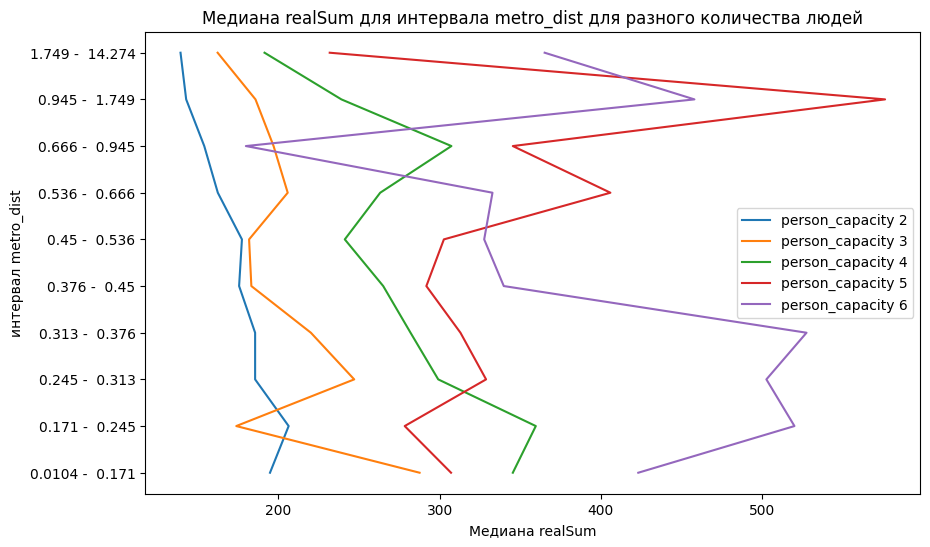

In [ ]:
# График медианы realSum для интервалов metro_dist для разного количества людей
import matplotlib.pyplot as plt

person_capacity_list = [2, 3, 4, 5, 6]

plt.figure(figsize=(10, 6))

for person_capacity in person_capacity_list:
    filtered_df = berlin_df[(berlin_df['person_capacity'] == person_capacity)]
    grouped_df = filtered_df.groupby(['metro_dist_interval'])["realSum"].median().reset_index()

    plt.plot(grouped_df['realSum'], grouped_df['metro_dist_interval'], label=f'person_capacity {person_capacity}')

plt.xlabel('Медиана realSum')
plt.ylabel('интервал metro_dist')
plt.title('Медиана realSum для интервала metro_dist для разного количества людей')
plt.legend()
plt.show()

Судя по графику для всех person_capacity, кроме равного 5, характерно снижение медианной стоимости аренды жилья по мере отдаления от метро.

Однако для person_capacity = 5 заметна обратная зависимость - по мере отдаления от метро стоимость аренды увеличивается.:

## Расположение домов/квартир на основе данных lng и lat

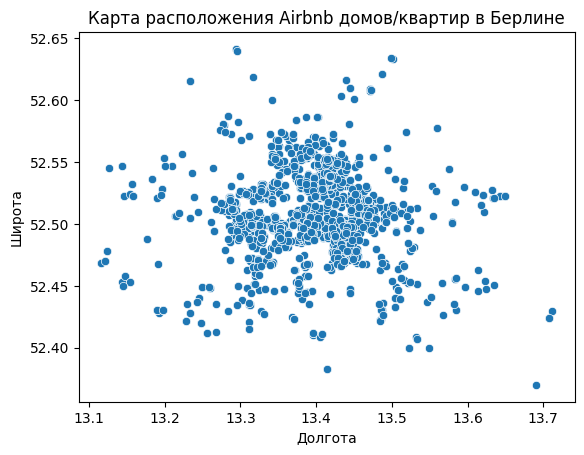

In [ ]:
# расположение домов/квартир на карте
import seaborn as sns

# Построение карты с помощью Seaborn
sns.scatterplot(data=berlin_df, x='lng', y='lat')

# Настройка заголовка и меток осей
plt.title('Карта расположения Airbnb домов/квартир в Берлине')
plt.xlabel('Долгота')
plt.ylabel('Широта')

# Отображение карты
plt.show()

Отобразим эти данные на карте Берлина с описанием каждого дома/квартиры

In [ ]:
!pip install folium # библиотека для визуализации интерактивных карт и геоданных

In [ ]:
berlin_df.columns

Index(['id', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat', 'weekday', 'dist_interval', 'metro_dist_interval'],
      dtype='object')

In [ ]:
berlin_df['metro_dist_interval'].unique()

array(['0.171 -  0.245', '0.45 -  0.536', '0.245 -  0.313',
       '0.666 -  0.945', '1.749 -  14.274', '0.313 -  0.376',
       '0.376 -  0.45', '0.536 -  0.666', '0.945 -  1.749',
       '0.0104 -  0.171'], dtype=object)

In [ ]:
# дома подходящие по критериям
best_flats = berlin_df[(berlin_df['room_type'] == 'Entire home/apt')&
                       (berlin_df['metro_dist'] <= 0.313)&
                       (berlin_df['person_capacity'] == 2) &
                       (berlin_df['bedrooms'] == 1) &
                       (berlin_df['guest_satisfaction_overall'] > 70)]

In [ ]:
best_flats

id     realSum        room_type  room_shared  room_private  \
15      15  375.572590  Entire home/apt        False         False   
41      41  293.540245  Entire home/apt        False         False   
42      42  147.237543  Entire home/apt        False         False   
94      94  209.871927  Entire home/apt        False         False   
103    103  197.251566  Entire home/apt        False         False   
...    ...         ...              ...          ...           ...   
1034  1034  290.034589  Entire home/apt        False         False   
1064  1064  236.514911  Entire home/apt        False         False   
1069  1069  322.286622  Entire home/apt        False         False   
1122  1122  254.978031  Entire home/apt        False         False   
1177  1177  370.898383  Entire home/apt        False         False   

      person_capacity  host_is_superhost  cleanliness_rating  \
15                  2              False                10.0   
41                  2               True                10.0   
42                  2              False                 9.0   
94                  2               True                10.0   
103                 2              False                10.0   
...               ...                ...                 ...   
1034                2              False                 9.0   
1064                2              False                10.0   
1069                2              False                10.0   
1122                2               True                10.0   
1177                2              False                10.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist       lng  \
15                         100.0         1  6.998011    0.197947  13.32388   
41                          99.0         1  5.593760    0.071927  13.34200   
42                          92.0         1  5.378410    0.226237  13.49325   
94                          99.0         1  7.822140    0.258123  13.31800   
103                         98.0         1  3.656614    0.193114  13.39574   
...                          ...       ...       ...         ...       ...   
1034                        90.0         1  2.873730    0.119442  13.41221   
1064                        96.0         1  2.013417    0.125801  13.41389   
1069                       100.0         1  2.678440    0.256003  13.41229   
1122                       100.0         1  9.532839    0.206185  13.32400   
1177                       100.0         1  5.888612    0.300858  13.35308   

           lat  weekday   dist_interval metro_dist_interval  
15    52.49587        1  6.003 -  7.411      0.171 -  0.245  
41    52.50200        1   5.19 -  6.003     0.0104 -  0.171  
42    52.51124        1   5.19 -  6.003      0.171 -  0.245  
94    52.48700        1  7.411 -  9.954      0.245 -  0.313  
103   52.49311        1  3.599 -  4.283      0.171 -  0.245  
...        ...      ...             ...                 ...  
1034  52.54912        0  2.538 -  3.091     0.0104 -  0.171  
1064  52.54145        0  1.643 -  2.538     0.0104 -  0.171  
1069  52.54736        0  2.538 -  3.091      0.245 -  0.313  
1122  52.45900        0  7.411 -  9.954      0.171 -  0.245  
1177  52.48735        0   5.19 -  6.003      0.245 -  0.313  

[109 rows x 17 columns]

In [ ]:
berlin_df[berlin_df['metro_dist'] <= 0.313]

id     realSum        room_type  room_shared  room_private  \
0        0  185.799757     Private room        False          True   
2        2  176.217631     Private room        False          True   
6        6  417.406750  Entire home/apt        False         False   
11      11   95.120127     Private room        False          True   
15      15  375.572590  Entire home/apt        False         False   
...    ...         ...              ...          ...           ...   
1177  1177  370.898383  Entire home/apt        False         False   
1180  1180  173.880527  Entire home/apt        False         False   
1187  1187  170.608582     Private room        False          True   
1191  1191  231.840703     Private room        False          True   
1192  1192  127.605871     Private room        False          True   

      person_capacity  host_is_superhost  cleanliness_rating  \
0                   2               True                10.0   
2                   2              False                 9.0   
6                   6               True                10.0   
11                  2              False                 9.0   
15                  2              False                10.0   
...               ...                ...                 ...   
1177                2              False                10.0   
1180                2              False                10.0   
1187                2              False                 9.0   
1191                2              False                10.0   
1192                2              False                 9.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist       lng  \
0                           98.0         1  3.582211    0.174706  13.42344   
2                           91.0         1  3.801713    0.281397  13.47096   
6                           97.0         2  3.838824    0.298430  13.37279   
11                          90.0         1  3.556290    0.187019  13.46714   
15                         100.0         1  6.998011    0.197947  13.32388   
...                          ...       ...       ...         ...       ...   
1177                       100.0         1  5.888612    0.300858  13.35308   
1180                       100.0         0  9.079524    0.222133  13.38573   
1187                        93.0         1  3.769378    0.291099  13.38274   
1191                        97.0         2  5.878112    0.131641  13.34903   
1192                        94.0         1  5.832898    0.153440  13.35218   

           lat  weekday   dist_interval metro_dist_interval  
0     52.49150        1  3.091 -  3.599      0.171 -  0.245  
2     52.51527        1  3.599 -  4.283      0.245 -  0.313  
6     52.50157        1  3.599 -  4.283      0.245 -  0.313  
11    52.51507        1  3.091 -  3.599      0.171 -  0.245  
15    52.49587        1  6.003 -  7.411      0.171 -  0.245  
...        ...      ...             ...                 ...  
1177  52.48735        0   5.19 -  6.003      0.245 -  0.313  
1180  52.44401        0  7.411 -  9.954      0.171 -  0.245  
1187  52.49655        0  3.599 -  4.283      0.245 -  0.313  
1191  52.49035        0   5.19 -  6.003     0.0104 -  0.171  
1192  52.48870        0   5.19 -  6.003     0.0104 -  0.171  

[745 rows x 17 columns]

In [ ]:
# !pip install folium # библиотека для визуализации интерактивных карт и геоданных

In [ ]:
import folium


# Создание центральной точки карты для точного определения местоположения карты
center_lat, center_lng = berlin_df['lat'].mean(), berlin_df['lng'].mean()

# Создание объекта карты Берлина
map_berlin = folium.Map(location=[center_lat, center_lng], zoom_start=11)

# Отметка расположения домов на карте с всплывающей информацией
for index, row in berlin_df.iterrows():
    tooltip = (f"ID: {row['id']}<br>\
              Стоимость аренды: {round(row['realSum'], 2)} €<br>\
              Тип жилья: {row['room_type']} <br>\
              Общий номер: {row['room_shared']} <br>\
              Личная комната: {row['room_private']} <br>\
              Вместимость: {row['person_capacity']} <br>\
              Статус superhost: {row['host_is_superhost']} <br>\
              Рейтинг чистоты: {row['cleanliness_rating']} <br>\
              Оценка постояльцев: {row['guest_satisfaction_overall']} <br>\
              Количество спален: {row['bedrooms']} <br>\
              Расстояние до центра: {round(row['dist'], 4)} км<br>\
              Расстояние до метро: {round(row['metro_dist'], 4)} км<br>\
              Широта и долгота: {row['lat'], row['lng']}"
              )
    color = 'red' if row['id'] in best_flats['id'].values else 'blue'
    folium.Marker(location=[row['lat'], row['lng']], tooltip=tooltip, icon=folium.Icon(color=color)).add_to(map_berlin)

# Отображение карты
map_berlin